In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
# Read the dataset
df = pd.read_csv("./data/churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Get a summary of the data
def get_summary(df, text):
    print(f"{text}:\n")
    print("Number of rows:", df.shape[0])
    print("Number of columns(features):", df.shape[1])
    print("Columns:", df.columns.tolist())
    print("\nData types:\n", df.dtypes)
    print("\nNumber of unique values in each column:")
    print(df.nunique())
    print("\nNumber of missing values in each column:")
    missing_values = df.isnull().sum()
    if missing_values[missing_values > 0].any():
        print(missing_values[missing_values > 0])
    else:
        print("No missing values")

get_summary(df, "Original dataset")

Original dataset:

Number of rows: 7043
Number of columns(features): 21
Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Data types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                

##### There are 17 categorical features in this dataset:
- **customerID:** Customer ID unique for each customer
- **gender:** Whether the customer is a male or a female
- **SeniorCitizen:** Whether the customer is a senior citizen or not (1, 0)
- **Partner:** Whether the customer has a partner or not (Yes, No)
- **Dependents:** Whether the customer has dependents or not (Yes, No)
- **PhoneService:** Whether the customer has a phone service or not (Yes, No)
- **MultipeLines:** Whether the customer has multiple lines or not (Yes, No, No phone service)
- **InternetService:** Customer’s internet service provider (DSL, Fiber optic, No)
- **OnlineSecurity:** Whether the customer has online security or not (Yes, No, No internet service)
- **OnlineBackup:** Whether the customer has an online backup or not (Yes, No, No internet service)
- **DeviceProtection:** Whether the customer has device protection or not (Yes, No, No internet service)
- **TechSupport:** Whether the customer has tech support or not (Yes, No, No internet service)
- **StreamingTV:** Whether the customer has streaming TV or not (Yes, No, No internet service)
- **StreamingMovies:** Whether the customer has streaming movies or not (Yes, No, No internet service)
- **Contract:** The contract term of the customer (Month-to-month, One year, Two years)
- **PaperlessBilling:** The contract term of the customer (Month-to-month, One year, Two years)
- **PaymentMethod:** The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

##### And 3 numerical features:
- **Tenure:** Number of months the customer has stayed with the company
- **MonthlyCharges:** The amount charged to the customer monthly
- **TotalCharges:** The total amount charged to the customer

##### The dataset includes information about:
- **Customers who left within the last month**:
  - Churn
- **Services that each customer has signed up for**:
  - PhoneService , MultipleLines , InternetService , OnlineSecurity , OnlineBackup , DeviceProtection , TechSupport , StreamingTV , StreamingMovies
- **Customer account information**:
  - tenure , Contract , PaperlessBilling , PaymentMethod , MonthlyCharges , TotalCharges
- **Demographic info about customers**:
  - gender , SeniorCitizen , Partner , Dependents

##### Target variable:
- **Churn**: Whether the customer churned or not (Yes or No)

#### Explore target variable

In [ ]:
target_col = df["Churn"].value_counts().to_frame()
target_col = target_col.reset_index()
target_col = target_col.rename(columns={"index": "Category"})

fig = px.pie(target_col, values="Churn", names="Category", title="Distribution of Churn")
fig.show()

We are trying to predict users that left the company in the previous month. 
It is a binary classification problem with an imbalanced target variable.
- Churn: No - 73.5% (5174 of the customers did not churn)
- Churn: Yes - 26.5% (1869 of the customers did churn)

#### Explore Categorical features

In [ ]:
# Define a bar chart function to plot the distribution of the target variable compared to the other features.
def plot_bar_chart(feature, df=df):
    # Groupby the categorical features
    temp_df = df.groupby([feature, "Churn"]).size().reset_index()
    temp_df = temp_df.rename(columns={0: "Count"})

    # Calculate the value counts of each feature and its corresponding percentages
    value_counts_df = df[feature].value_counts().to_frame().reset_index()
    categories = [cat[1][0] for cat in value_counts_df.iterrows()]
    num__list = [num[1][1] for num in value_counts_df.iterrows()]
    div_list = [element / sum(num__list) for element in num__list]
    percentage = [round(element * 100, 2) for element in div_list]

    # Define string formatting for graph annotations
    # Numeric values
    def num_format(list_instance):
        formatted_str = ""
        for index, num in enumerate(list_instance):
            if index < len(list_instance) - 2:
                formatted_str = formatted_str + f"{num}%, "
            elif index == len(list_instance) - 2:
                formatted_str = formatted_str + f"{num}% & "
            else:
                formatted_str = formatted_str + f"{num}%"
        return formatted_str
    
    #Categorical values
    def str_format(list_instance):
        formatted_str = ""
        for index, cat in enumerate(list_instance):
            if index < len(list_instance) - 2:
                formatted_str = formatted_str + f"{cat}, "
            elif index == len(list_instance) - 2:
                formatted_str = formatted_str + f"{cat} & "
            else:
                formatted_str = formatted_str + f"{cat}"
        return formatted_str

    # Running the formatting functions
    num_str = num_format(percentage)
    cat_str = str_format(categories)

    # Setting up the bar chart
    fig = px.bar(temp_df, x=feature, y="Count", color="Churn", title=f"Churn rate by {feature}", 
        barmode="group", color_discrete_sequence=["green", "red"])
    fig.add_annotation(
        text=f'Value count of distribution of {cat_str} are<br>{num_str} percentage respectively.',
        align='left',
        showarrow=False,
        xref='paper',
        yref='paper',
        x=1.4,
        y=1.3,
        bordercolor='black',
        borderwidth=1)
    fig.update_layout(margin=dict(r=400),) # margin space for the annotations on the right
    return fig.show()

##### Visualize the features related to customers demographic 

In [ ]:
# Plot the bar chart for the gender variable
plot_bar_chart("gender")

In [ ]:
# Plot the bar chart for the SeniorCitizen variable
df.loc[df["SeniorCitizen"] == 0, "SeniorCitizen"] = "No" # Convert 0 to No in all instances
df.loc[df["SeniorCitizen"] == 1, "SeniorCitizen"] = "Yes" # Convert 1 to Yes in all instances

plot_bar_chart("SeniorCitizen")

In [ ]:
# Plot the bar chart for the Partner variable
plot_bar_chart("Partner")

In [ ]:
# Plot the bar chart for the Dependents variable
plot_bar_chart("Dependents")

#### Demographic analysis Insight: 
- Gender and partner are almost equally distributed with approximate percentage values. 
- 71.4% of SeniorCitizen's churned within the last month. Company should investigate this further and try to understand why the churn rate is so high among senior citizens.
- Customers without a partner, no dependencies have a high churn rate compared to customers with partner and dependents.  

##### Visualize the features related to Services that each customer has signed up for

In [ ]:
plot_bar_chart("PhoneService")
plot_bar_chart("MultipleLines")
plot_bar_chart("InternetService")
plot_bar_chart("OnlineSecurity")
plot_bar_chart("OnlineBackup")
plot_bar_chart("DeviceProtection")
plot_bar_chart("TechSupport")
plot_bar_chart("StreamingTV")
plot_bar_chart("StreamingMovies")

#### Services that each customer has signed up for Insight: 
These category of features shows significant variations across their values. 
- If a customer does not have a phone service, he/she cannot have multiple lines. 
- About 90.3% of the customers have phone services and have the higher rate to churn.
- Customers who have Fibre optic as internet service are more likely to churn, this can happen due to high prices, competition, customer service, and many other reasons. 
  - Fiber optic service is much more expensive than DSL which may be one of the reasons why customers churn. 
- Customers with OnlineSecurity ,OnlineBackup ,DeviceProtection and TechSupport are more unlikely to churn. 
- Streaming service is not predictive for churn as it evenly distributed to yes and no options.

##### Visualize the features related to Payment

In [ ]:
plot_bar_chart("Contract")
plot_bar_chart("PaperlessBilling")
plot_bar_chart("PaymentMethod")

#### Payment insights
- The shorter the contract the higher churn rate because those with longer plans face additional hurdles when canceling early.
  - This clearly explains the motivation for companies to have long-term relationship with their customers. 
- Churn Rate is higher for the customers who prefer paperless billing, About 59.2% of the customers make paperless billing. 
- Customers who pay with electronic check are more likely to churn and this kind of payment is more common than other payment types.

#### Explore Numeric features

In [ ]:
# find numerical variables
numerical_variables = [col for col in df.columns if df[col].dtype != "object"]
numerical_variables

['tenure', 'MonthlyCharges']

In [ ]:
try:
    df["TotalCharges"] = df["TotalCharges"].astype(float)
except ValueError as e:
    print(e)

could not convert string to float: 


In [ ]:
# There are missing values in TotalCharges column in form of blankspaces.
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
# If errors = coerce --> then invalid parsing will be set as NaN.
# Fill the missing values with the median of the column
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

In [ ]:
# Define the histogram plotting function for the numerical variables
def plot_histogram(feature):
    group_df = df.groupby([feature, "Churn"]).size().reset_index()
    group_df = group_df.rename(columns={0: "Count"})
    fig = px.histogram(group_df, x=feature, y="Count", color="Churn", marginal="box", 
        title = f"Churn rate frequency to {feature} distribution", color_discrete_sequence=["green", "red"])
    fig.show()

In [ ]:
plot_histogram("tenure")
plot_histogram("MonthlyCharges")
plot_histogram("TotalCharges")

#### Insights on Customer account information
- The tenure histogram is rightly skewed and shows that majority of customers has been with the telecom company for just the first few months (0-9 months) and the highest rate of churn is also in that first few months (0-9months). 
  - 75% of customers who end up leaving Telcom company do so within their first 30 months. 
- The monthly charge histogram shows that clients with higher monthly charges have a higher churn rate (This suggests that discounts and promotions can be an enticing reason for customers to stay). 
- The total charge trend is quite depict due to variation in frequency. 

Lets bin the numeric features into 3 sections based on quantiles (low, medium and high to get more information from it).

In [ ]:
# Create an empty dataframe
bin_df = pd.DataFrame()

# Update the dataframe with the bins
bin_df["tenure_bins"] = pd.qcut(df["tenure"], q=3, labels=["low", "medium", "high"])
bin_df["MonthlyCharges_bins"] = pd.qcut(df["MonthlyCharges"], q=3, labels=["low", "medium", "high"])
bin_df["TotalCharges_bins"] = pd.qcut(df["TotalCharges"], q=3, labels=["low", "medium", "high"])
bin_df["Churn"] = df["Churn"]

# Plot the bar chart of the binned variables
plot_bar_chart("tenure_bins", bin_df)
plot_bar_chart("MonthlyCharges_bins", bin_df)
plot_bar_chart("TotalCharges_bins", bin_df)

- Based on binning, the low tenure and high monthly charge bins have higher churn rates as supported with the previous analysis. 
- While the low Total charge bin has a higher churn rate.

#### Data Preprocessing

In [ ]:
# The customerID column is used for identification purposes, it will not bring any information to the model.
df.drop(["customerID"], axis=1, inplace=True)

# Encode categorical variables
# Define the function to encode categorical variables
def binary_map(feature):
    return feature.map({"Yes": 1, "No": 0})

# Encode the target variable
df["Churn"] = df[["Churn"]].apply(binary_map)

# Encode gender variable
df["gender"] = df["gender"].map({"Male":1, "Female": 0})

# Encode the other binary variables
binary_list = ["SeniorCitizen", "Partner", "Dependents", "PhoneService", "PaperlessBilling"]
df[binary_list] = df[binary_list].apply(binary_map)

# Encode the other categorical variables with more than 2 categories
df = pd.get_dummies(df, drop_first=True)

In [ ]:
# Check the correlation between the variables
corr = df.corr()

fig = px.imshow(corr, width=800, height=800)
fig.show()

Correlation is a statistical term is a measure on linear relationship with two variables. Features with high correlation are more linearly dependent and have almost the same effect on the dependent variable. So when two features have a high correlation(multicollinearity), we can drop one of the two features.

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Change variable name seperators to '_'
all_columns = [column.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_") for column in df.columns]

# Rename the columns
df.columns = all_columns

# Prepare the data for the GLM formula
glm_columns = [column for column in all_columns if column not in ["Churn"]]
glm_columns = "+".join(map(str, glm_columns))

# Fitting it to the Generalized Linear Model
glm_model = smf.glm(formula=f"Churn ~ {glm_columns}", data=df, family=sm.families.Binomial())
glm_results = glm_model.fit()
print(glm_results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                            GLM   Df Residuals:                     7019
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2914.7
Date:                Mon, 21 Mar 2022   Deviance:                       5829.3
Time:                        10:51:06   Pearson chi2:                 8.04e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [ ]:
np.exp(glm_results.params)

Intercept                                2.287343
gender                                   0.978355
SeniorCitizen                            1.239957
Partner                                  0.997312
Dependents                               0.857471
tenure                                   0.942322
PhoneService                             1.654668
PaperlessBilling                         1.407543
MonthlyCharges                           0.960432
TotalCharges                             1.000318
MultipleLines_No_phone_service           1.382358
MultipleLines_Yes                        1.563475
InternetService_Fiber_optic              5.771657
InternetService_No                       0.774257
OnlineSecurity_No_internet_service       0.774257
OnlineSecurity_Yes                       0.814269
OnlineBackup_No_internet_service         0.774257
OnlineBackup_Yes                         1.026127
DeviceProtection_No_internet_service     0.774257
DeviceProtection_Yes                     1.159152


#### Feature Scaling

In [ ]:
# Scale numerical variables to the range of 0 to 1(default range) using MinMaxScaler.
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
df["tenure"] = sc.fit_transform(df[["tenure"]])
df["MonthlyCharges"] = sc.fit_transform(df[["MonthlyCharges"]])
df["TotalCharges"] = sc.fit_transform(df[["TotalCharges"]])

#### Create a baseline model

In [ ]:
# Import various classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Import performance evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X = df.drop(["Churn"], axis=1)
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
def modeling(alg, alg_name, params={}):
    model = alg(**params) # **params is used to pass the parameters as a dictionary to the model.
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print(f"Accuracy: {acc_score}")
        pre_score = precision_score(y_true, y_pred)
        print(f"Precision: {pre_score}")
        rec_score = recall_score(y_true, y_pred)                            
        print(f"Recall: {rec_score}")
        f_score = f1_score(y_true, y_pred, average="weighted")
        print(f"F1 Score: {f_score}")

    print_scores(alg, y_test, y_pred)
    return model

In [ ]:
# Logistic Regression
log_model = modeling(LogisticRegression, "Logistic Regression")

Logistic Regression
Accuracy: 0.812588736393753
Precision: 0.6877637130801688
Recall: 0.5679442508710801
F1 Score: 0.8065959317426014


#### Feature selection

In [ ]:
# Feature selection to improve the model
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

log = LogisticRegression()
rfecv = RFECV(estimator=log, cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True), scoring="accuracy")
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
      estimator=LogisticRegression(), scoring='accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning:

The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.



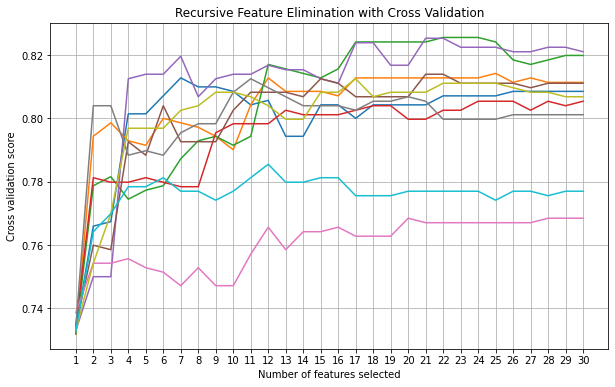

Optimal number of features: 22


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.grid()
plt.xticks(range(1, X.shape[1] + 1))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.title("Recursive Feature Elimination with Cross Validation")
plt.show()

print(f"Optimal number of features: {rfecv.n_features_}")

In [ ]:
# Saving dataframe with optimal features
X_rfe = X.iloc[:, rfecv.support_]

# Overview of the optimal features in comparison to the original dataframe
print(f"X dimensions: {X.shape}")
print(f"X columns: {X.columns.tolist()}")
print(f"X_rfe dimensions: {X_rfe.shape}")
print(f"X_rfe columns: {X_rfe.columns.tolist()}")

X dimensions: (7043, 30)
X columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No_phone_service', 'MultipleLines_Yes', 'InternetService_Fiber_optic', 'InternetService_No', 'OnlineSecurity_No_internet_service', 'OnlineSecurity_Yes', 'OnlineBackup_No_internet_service', 'OnlineBackup_Yes', 'DeviceProtection_No_internet_service', 'DeviceProtection_Yes', 'TechSupport_No_internet_service', 'TechSupport_Yes', 'StreamingTV_No_internet_service', 'StreamingTV_Yes', 'StreamingMovies_No_internet_service', 'StreamingMovies_Yes', 'Contract_One_year', 'Contract_Two_year', 'PaymentMethod_Credit_card__automatic_', 'PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check']
X_rfe dimensions: (7043, 22)
X_rfe columns: ['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No_phone_service', 'MultipleLines_Yes', 'InternetServic

In [ ]:
# Split the data with the optimal features into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.3, random_state=42)

In [ ]:
# Running logistic regression
log_model = modeling(LogisticRegression, "Logistic Regression")

Logistic Regression
Accuracy: 0.8116422148603881
Precision: 0.6856540084388185
Recall: 0.5662020905923345
F1 Score: 0.805619143519079


In [ ]:
# Running SVC
svc_model = modeling(SVC, "SVC")

SVC
Accuracy: 0.8035967818267865
Precision: 0.6943765281173594
Recall: 0.49477351916376305
F1 Score: 0.7921096786778191


In [ ]:
# Running Random Forest Classifier
rf_model = modeling(RandomForestClassifier, "Random Forest Classifier")

Random Forest Classifier
Accuracy: 0.7865593942262187
Precision: 0.6460807600950119
Recall: 0.4738675958188153
F1 Score: 0.7752027442539716


In [ ]:
# Running Decision Tree Classifier
dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classifier")

Decision Tree Classifier
Accuracy: 0.7335541883577852
Precision: 0.5105162523900574
Recall: 0.4651567944250871
F1 Score: 0.7295320167954189


In [ ]:
from xgboost import XGBClassifier
# Running XGBoost Classifier
xgb_model = modeling(XGBClassifier, "XGBoost Classifier", params={"use_label_encoder": False})

XGBoost Classifier
Accuracy: 0.8017037387600567
Precision: 0.679814385150812
Recall: 0.5104529616724739
F1 Score: 0.791997889609071


In [ ]:
from lightgbm import LGBMClassifier
# Running LightGBM Classifier
lgbm_model = modeling(LGBMClassifier, "LightGBM Classifier")

LightGBM Classifier
Accuracy: 0.795551348793185
Precision: 0.6599099099099099
Recall: 0.5104529616724739
F1 Score: 0.7866396687903158


In [ ]:
# Improve the best model by tuning hyperparameters
# Define the model
model = LogisticRegression()

# Define evaluation
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define parameters
from scipy.stats import loguniform
space = dict()
space["solver"] = ["newton-cg", "lbfgs", "liblinear", "saga"]
space["penalty"] = ["none", "l1", "l2", "elasticnet"]
space["C"] = loguniform(1e-5, 1000)

# Define the search
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(estimator=model, param_distributions=space, n_iter=500, cv=cv, scoring="accuracy", n_jobs=-1, verbose=1)

# Fit the search
result = search.fit(X_rfe, y)

# Summarize the results
print(f"Best Score: {result.best_score_}")
print(f"Best Parameters: {result.best_params_}")

Fitting 30 folds for each of 500 candidates, totalling 15000 fits
Best Score: 0.8045796394799054
Best Parameters: {'C': 96.14795312015154, 'penalty': 'l2', 'solver': 'newton-cg'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


6540 fits failed out of a total of 15000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
750 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError:

In [ ]:
params = result.best_params_
params

{'C': 96.14795312015154, 'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
#Improving the Logistic Regression model
log_model = modeling(LogisticRegression, 'Logistic Regression Classification', params=params)

Logistic Regression Classification
Accuracy: 0.8116422148603881
Precision: 0.6825726141078838
Recall: 0.573170731707317
F1 Score: 0.8061705031280859


In [ ]:
import joblib
#Saving best model 
filename = 'model.sav'
joblib.dump(log_model, filename)

['model.sav']